In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Getting to know the Data

In [2]:
data=pd.read_csv('O:/DATA SCIENCE/datasets/Concrete_Data.csv')
df=data.copy()
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
# Renameing the columns for ease of coding
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash','Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate','Water  (component 4)(kg in a m^3 mixture)':'Water','Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate','Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'},inplace=True)

In [4]:
df.shape

(1030, 9)

In [5]:
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age (day)                      1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
# As we can see, there aren't any missing values.

# Data Analysis

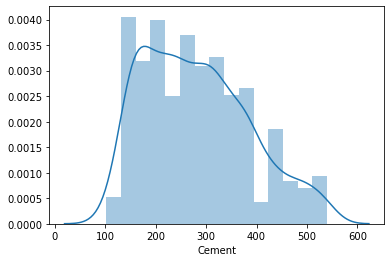

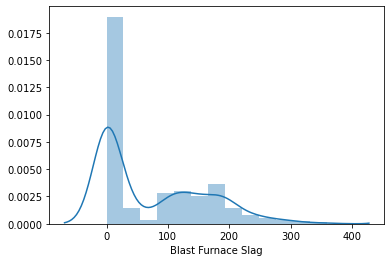

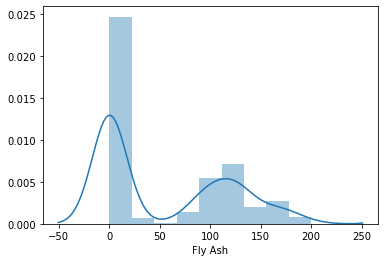

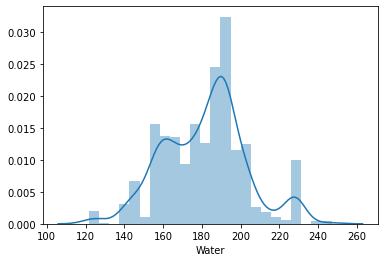

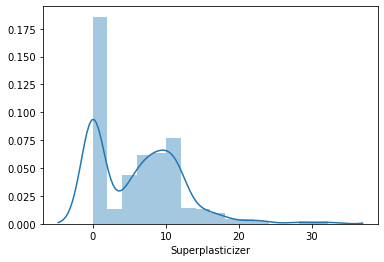

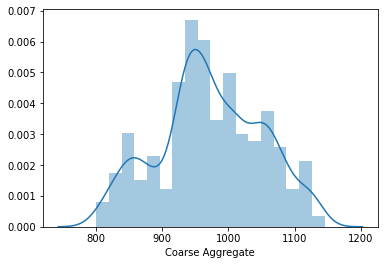

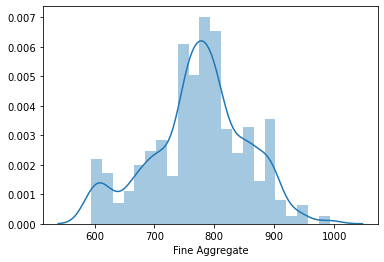

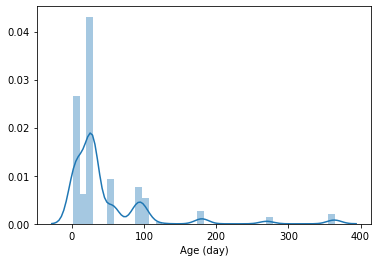

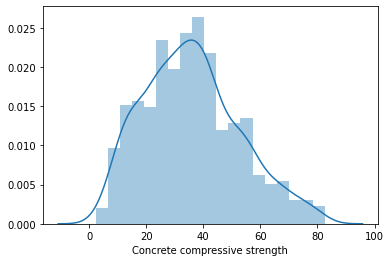

In [9]:
# Univariate Analysis and Outlier Detection
for x in df.columns:
    sns.distplot(df[x])
    plt.show()

After analysing the distribution of all the components, It is clear that some of the have outliers like Age, Superplasticzer,water and Blast furnace Slag

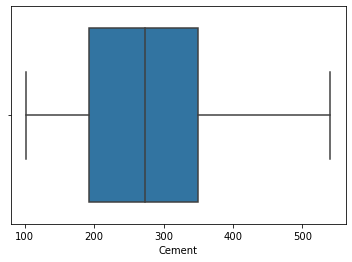

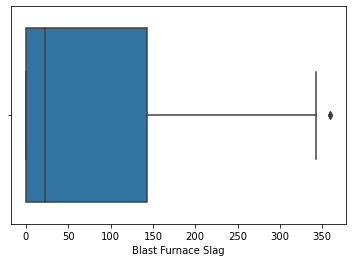

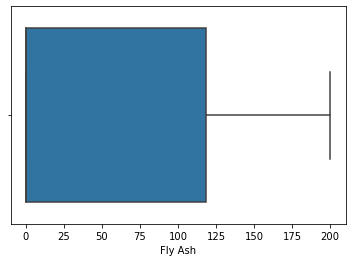

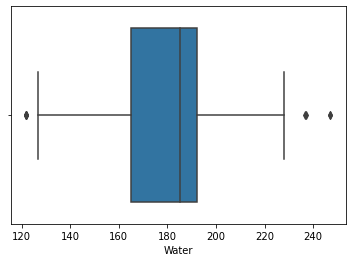

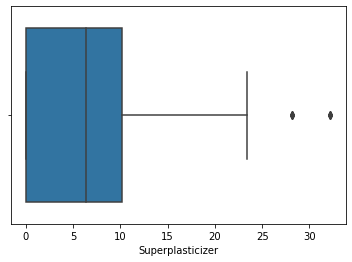

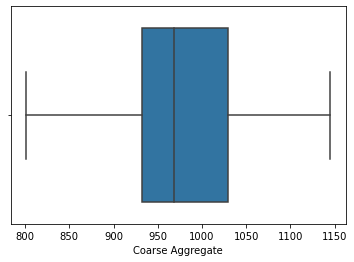

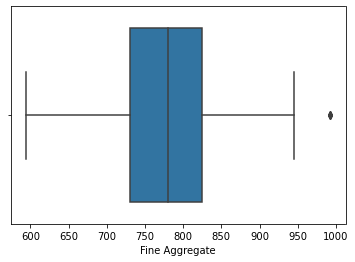

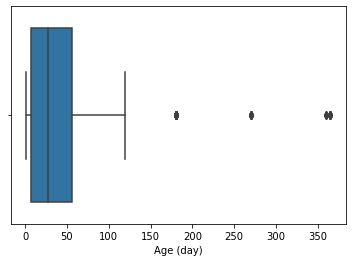

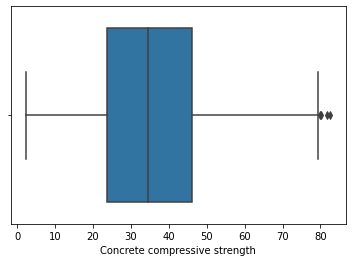

In [10]:
for x in df.columns:
    sns.boxplot(df[x])
    plt.show()

# Outlier Treatment

In [11]:
# User-defined code for outlier treatment and lower and upper bounds
def Outlier_treatment(a,df):
    q1 = np.percentile(df[a],25,interpolation='midpoint')
    q3 = np.percentile(df[a],75,interpolation='midpoint')
    iqr= q3-q1
    lb = q1-1.5*(iqr)
    ub = q3+1.5*(iqr)
    outliers=[]
    for x in df[a]:
        if x<lb or x>ub:
            outliers.append(x)
    print('Number of outliers= {}'.format(len(outliers)))
    po=(len(outliers)*100)/len(df[a])
    print('Percentage of Outliers={0:6.2f}%'.format(po))
    print('lower bound = {},\nupper bound = {}'.format(lb,ub))
    return lb,ub

In [12]:
lb,ub=Outlier_treatment('Age (day)',df)

Number of outliers= 59
Percentage of Outliers=  5.73%
lower bound = -66.5,
upper bound = 129.5


Outlier treatment to Age feature column

In [13]:
df=df[(df['Age (day)']>lb) & (df['Age (day)']<ub)]
df.shape

(971, 9)

Outlier treatment to SuperPlasticizer feature column

In [14]:
lb,ub=Outlier_treatment('Superplasticizer',df)

Number of outliers= 10
Percentage of Outliers=  1.03%
lower bound = -15.600000000000001,
upper bound = 26.0


In [15]:
df=df[(df['Superplasticizer']>lb) & (df['Superplasticizer']<ub)]
df.shape

(961, 9)

Outlier treatment to Water feature column

In [16]:
lb,ub=Outlier_treatment('Water',df)

Number of outliers= 9
Percentage of Outliers=  0.94%
lower bound = 124.25000000000001,
upper bound = 232.64999999999998


In [17]:
df=df[(df['Water']>lb) & (df['Water']<ub)]
df.shape

(952, 9)

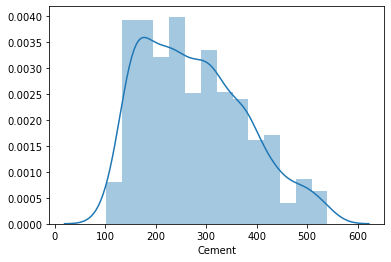

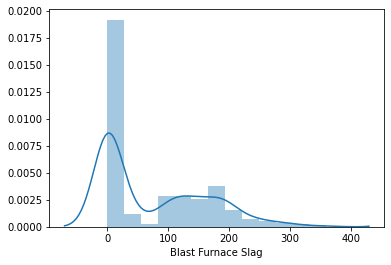

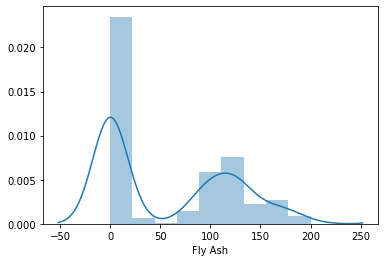

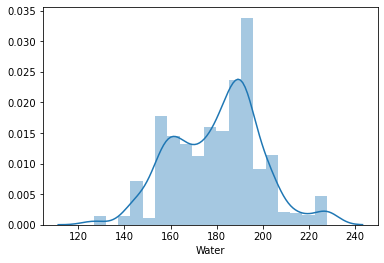

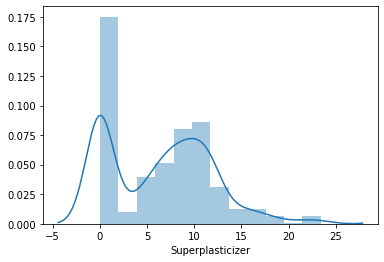

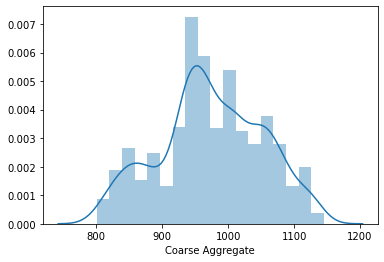

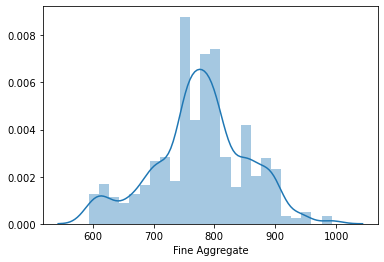

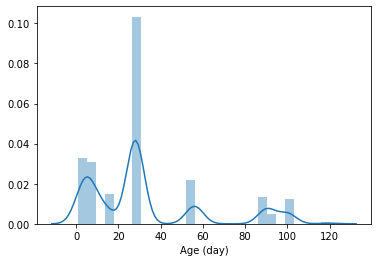

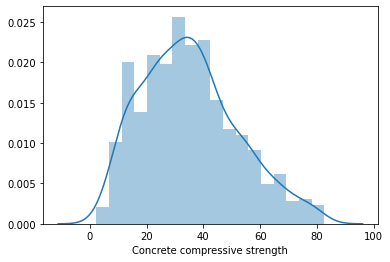

In [18]:
for x in df.columns:
    sns.distplot(df[x])
    plt.show()

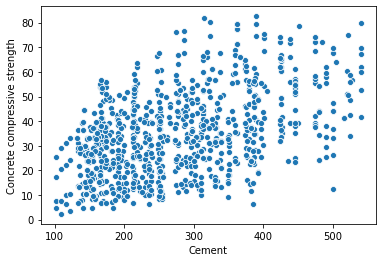

In [19]:
#Multi-Variate Analysis
sns.scatterplot(x='Cement',y='Concrete compressive strength', data=df)
plt.show()

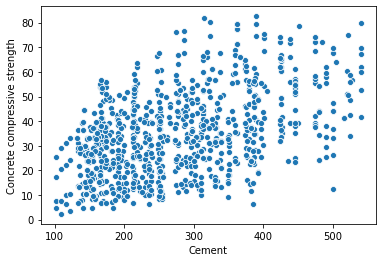

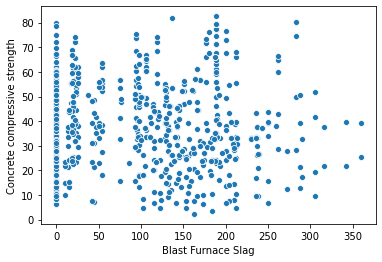

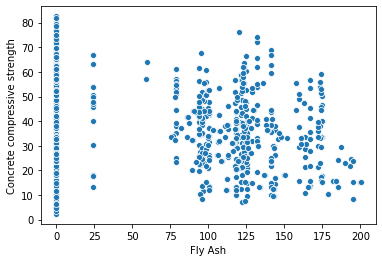

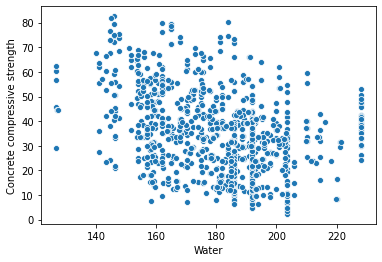

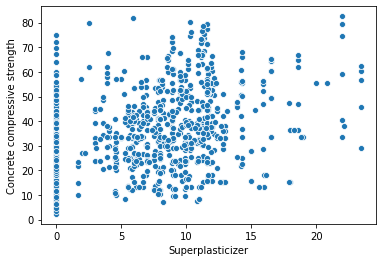

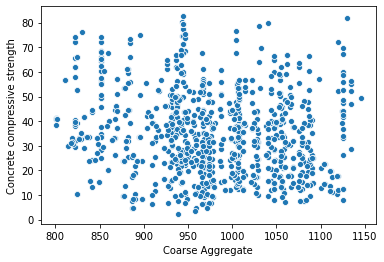

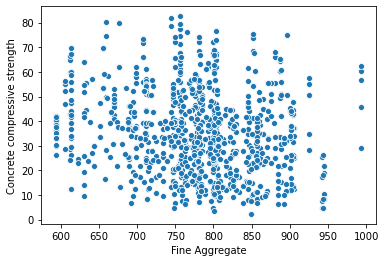

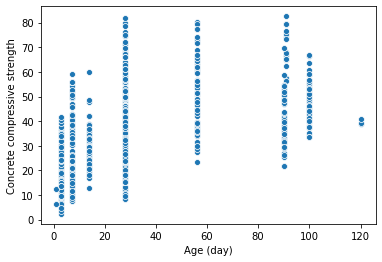

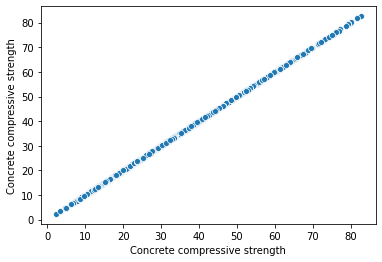

In [20]:
for x in df.columns:
    sns.scatterplot(x=x,y='Concrete compressive strength',data=df)
    plt.show()

Checking the Collinearlity between different Variables

names= list(df.columns)
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation=90)
ax.set_yticklabels(names)
plt.show()

We observe that superplasticizer and Water are  highly negatively correlated with eact other.

In [21]:
correlation = df['Superplasticizer']. corr(df['Water'])
print(correlation)

-0.6560740984264956


In [22]:
correlation = df['Superplasticizer']. corr(df['Fly Ash'])
print(correlation)

0.4220506819911525


In [23]:
print(df['Fine Aggregate']. corr(df['Water']))

-0.3859673651628672


In [24]:
print(df['Age (day)']. corr(df['Water']))

-0.027465460154323596


In [25]:
print( df['Fly Ash'].corr(df['Cement']))

-0.3778015748348713


Except for superplasticizer and water, All other features are moderately correlated to eact other at best.

# Modelling

### Using RMSE, MSE and MAE as metrics for Evaluation

In [26]:
# Modelling

target=df['Concrete compressive strength']
inputs= df.drop('Concrete compressive strength',axis=1)

x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=42)

regM=LinearRegression()
regM.fit(x_train,y_train)

y_pred_s=regM.predict(x_test)

#Using RMSE, MSE and MAE as metrics for Evaluation

print('R2 Score: {}'.format(r2_score(y_test,y_pred_s)))

MSE  = mean_squared_error(y_test,y_pred_s)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_s)
print('MAE :{}'.format(MAE))

print ("training score", regM.score(x_train, y_train))

print ("test score", regM.score(x_test,y_test))

R2 Score: 0.7707292923357508
MSE :67.33473297334115
RMSE :8.205774367684086
MAE :5.950134031411538
training score 0.7660528070618817
test score 0.7707292923357508


## 1. Ridge Regression

In [27]:
ridgeM = Ridge(alpha=1)

In [28]:
ridgeM.fit(x_train,y_train)

Ridge(alpha=1)

In [29]:
y_pred_Ridge=ridgeM.predict(x_test)

In [30]:
print('R2 Score: {}'.format(r2_score(y_test,y_pred_Ridge)))

MSE  = mean_squared_error(y_test,y_pred_Ridge)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_Ridge)
print('MAE :{}'.format(MAE))

print ("training score", ridgeM.score(x_train, y_train))

print ("test score", ridgeM.score(x_test,y_test))

R2 Score: 0.7707295533765992
MSE :67.33465630800521
RMSE :8.205769696256727
MAE :5.9501319311116445
training score 0.7660528070439043
test score 0.7707295533765992


### Hyperparameter Tuning

In [31]:
alphas=[0.001,0.01,0.1,0.005,0.05,0.5,1,2]

In [32]:
gridsearch = GridSearchCV(estimator = ridgeM,param_grid=dict(alpha=alphas))

In [33]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.005, 0.05, 0.5, 1, 2]})

In [34]:
best_parameters = gridsearch.best_params_
print(best_parameters)

{'alpha': 2}


In [35]:
ridgeM = Ridge(alpha=2)
ridgeM.fit(x_train,y_train)


Ridge(alpha=2)

In [36]:
y_pred_Ridge_HP=ridgeM.predict(x_test)

In [37]:
R2_ridge = r2_score(y_test,y_pred_Ridge_HP)
print('R2 Score: {}'.format(r2_score(y_test,y_pred_Ridge_HP)))

MSE_ridge  = mean_squared_error(y_test,y_pred_Ridge_HP)
RMSE_ridge = np.sqrt(MSE_ridge)
print('MSE :{}\nRMSE :{}'.format(MSE_ridge,RMSE_ridge))

MAE_ridge = mean_absolute_error(y_test,y_pred_Ridge_HP)
print('MAE :{}'.format(MAE_ridge))

train_score_ridge = ridgeM.score(x_train, y_train)
test_score_ridge  = ridgeM.score(x_test,y_test)
print ("training score",  train_score_ridge)

print ("test score", test_score_ridge )

R2 Score: 0.7707298143176021
MSE :67.33457967199301
RMSE :8.205765026613486
MAE :5.950129830616934
training score 0.7660528069899875
test score 0.7707298143176021


## 2. Lasso Regression

In [38]:
lassor = Lasso(alpha=1)
lassor.fit(x_train,y_train)

Lasso(alpha=1)

In [39]:
y_pred_lasso=lassor.predict(x_test)

In [40]:
R2_lasso = r2_score(y_test,y_pred_lasso)
print('R2 Score: {}'.format(R2_lasso))

MSE_lasso  = mean_squared_error(y_test,y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
print('MSE :{}\nRMSE :{}'.format(MSE_lasso,RMSE_lasso))

MAE_lasso = mean_absolute_error(y_test,y_pred_lasso)
print('MAE :{}'.format(MAE_lasso))


train_score_lasso = lassor.score(x_train, y_train)
test_score_lasso  = lassor.score(x_test,y_test)

print ("training score",train_score_lasso )
print ("test score", test_score_lasso )

R2 Score: 0.7715616980595763
MSE :67.09026294177762
RMSE :8.190864602822929
MAE :5.9497110336903996
training score 0.7658366160332071
test score 0.7715616980595763


##  3. Decision Tree Regressor

In [41]:
DTmodel= DecisionTreeRegressor()

In [42]:
DTmodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
y_pred_DT=DTmodel.predict(x_test)

In [44]:
print('R2 Score: {}'.format(r2_score(y_test,y_pred_DT)))

MSE  = mean_squared_error(y_test,y_pred_DT)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_DT)
print('MAE :{}'.format(MAE))
print('training score :{}\ntest score :{}' .format(DTmodel.score(x_train,y_train),DTmodel.score(x_test,y_test)))

R2 Score: 0.8165211305724307
MSE :53.88608429319371
RMSE :7.340714154167407
MAE :4.564240837696335
training score :0.9989573796993091
test score :0.8165211305724307


### Hyperparameter Tuning

In [45]:
hyperparameters={
    'criterion':[ 'squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],
    'max_depth': [80,90,100,110],
    'min_samples_leaf': [2,3,4,5,6],
    'min_samples_split': [4,5,6,7,8,10,12],
    'max_features': [1,2,3,4,5,6,7,8]}


In [94]:
grid_search=GridSearchCV(estimator=DTmodel,param_grid=hyperparameters,cv=5,n_jobs=-1)

In [47]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8, 10, 12]})

In [48]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'mae', 'max_depth': 80, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [49]:
grid_search.best_score_

0.8338951272099526

In [50]:
dmodel = DecisionTreeRegressor(criterion='mse',max_depth=80,max_features=5,min_samples_leaf=2,min_samples_split=4)

In [51]:
dmodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=80, max_features=5, min_samples_leaf=2,
                      min_samples_split=4)

In [52]:
y_pred_hp=dmodel.predict(x_test)

In [53]:
R2_dt = r2_score(y_test,y_pred_hp)
print('R2 Score: {}'.format(r2_score(y_test,y_pred_hp)))

MSE_dt = mean_squared_error(y_test,y_pred_hp)
RMSE_dt = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE_dt,RMSE_dt))

MAE_dt = mean_absolute_error(y_test,y_pred_hp)
print('MAE :{}'.format(MAE_dt))

train_score_dt = dmodel.score(x_train,y_train)
test_score_dt  = dmodel.score(x_test,y_test)
print('training score :{}\ntest score :{}' .format(train_score_dt,test_score_dt))

R2 Score: 0.7424345158872039
MSE :75.64465287594533
RMSE :7.340714154167407
MAE :5.501767015706807
training score :0.9798088836900163
test score :0.7424345158872039


## 4. Random Forest

In [54]:
rf= RandomForestRegressor()

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
y_pred_rf=rf.predict(x_test)

In [57]:
print('R2 Score: {}'.format(r2_score(y_test,y_pred_rf)))

MSE  = mean_squared_error(y_test,y_pred_rf)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_rf)
print('MAE :{}'.format(MAE))
print('training score :{}\ntest score :{}' .format(rf.score(x_train,y_train),rf.score(x_test,y_test)))

R2 Score: 0.8921813057404987
MSE :31.665375230269316
RMSE :5.627199590406343
MAE :3.4847703243164596
training score :0.987420913634727
test score :0.8921813057404987


### Hyperparamter Tuning

In [58]:
hyperparameters={
    'bootstrap': [True],
    'max_depth': [80,90,100,110],
    'min_samples_leaf': [3,4,5,6],
    'min_samples_split': [4,6,8,10],
    'max_features': [2,3,4,5,6],
    'n_estimators': [100,200,300]
}

In [59]:
grid_search=GridSearchCV(estimator=rf,param_grid=hyperparameters,cv=5,n_jobs=-1)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]})

In [61]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_depth': 100, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 300}


In [62]:
grid_search.best_score_

0.884723940777439

In [63]:
rfh = RandomForestRegressor(bootstrap = True, max_depth = 110, max_features = 5, min_samples_leaf = 3, min_samples_split = 6, n_estimators = 200, random_state = 0)
rfh.fit(x_train,y_train)

RandomForestRegressor(max_depth=110, max_features=5, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=200, random_state=0)

In [64]:
y_pred_rfhp = rfh.predict(x_test)

In [65]:
R2_rf = r2_score(y_test,y_pred_rfhp)
print('R2 Score: {}'.format(r2_score(y_test,y_pred_rfhp)))

MSE_rf  = mean_squared_error(y_test,y_pred_rfhp)
RMSE_rf = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE_rf,RMSE_rf))

MAE_rf= mean_absolute_error(y_test,y_pred_rfhp)
print('MAE :{}'.format(MAE_rf))

train_score_rf = rfh.score(x_train,y_train)
test_score_rf  = rfh.score(x_test,y_test)
print('training score :{}\ntest score :{}' .format(train_score_rf,test_score_rf))

R2 Score: 0.8835896332005582
MSE :34.188671739296
RMSE :5.627199590406343
MAE :3.899815831641943
training score :0.9612842804510702
test score :0.8835896332005582


# 5. KNN Regressor

In [66]:
KNN = KNeighborsRegressor()

In [67]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [68]:
y_pred_k=KNN.predict(x_test)

In [69]:
print('R2 Score: {}'.format(r2_score(y_test,y_pred_k)))

MSE  = mean_squared_error(y_test,y_pred_k)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_k)
print('MAE :{}'.format(MAE))
print('training score :{}\ntest score :{}' .format(KNN.score(x_train,y_train),KNN.score(x_test,y_test)))

R2 Score: 0.6706886986247049
MSE :96.71575042931939
RMSE :9.834416628825494
MAE :7.364743455497381
training score :0.7988617348531366
test score :0.6706886986247049


### Hyper parameter tuning

Hyperparameters of KNN are leaf_size,n_neighbors,p

In [70]:
Hyperparameters = {
    'leaf_size' : list(range(1,50)),
    'n_neighbors' : list(range(1,30)),
    'p' : [1,2]
}

In [71]:
knn = KNeighborsRegressor()
clf = GridSearchCV(knn,Hyperparameters,cv =10)

In [72]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [73]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 3, 'n_neighbors': 5, 'p': 1}


In [74]:
clf.best_score_

0.6862278024274818

In [75]:
knn = KNeighborsRegressor(leaf_size = 3,n_neighbors = 5,p=1)
knn.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=3, p=1)

In [76]:
y_pr_knn= knn.predict(x_test)

In [77]:
R2_knn=r2_score(y_test,y_pr_knn)
print('R2 Score: {}'.format(R2_knn))

MSE_knn  = mean_squared_error(y_test,y_pr_knn)
RMSE_knn = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE_knn,RMSE_knn))

MAE_knn = mean_absolute_error(y_test,y_pr_knn)
print('MAE :{}'.format(MAE_knn))

train_score_knn = knn.score(x_train,y_train)
test_score_knn  = knn.score(x_test,y_test)

print('training score :{}\ntest score :{}' .format(train_score_knn,test_score_knn))

R2 Score: 0.653682971645661
MSE :101.71017861780105
RMSE :9.834416628825494
MAE :7.6177696335078515
training score :0.7854638534668673
test score :0.653682971645661


# 6. SVM Regressor

In [78]:
svmm= SVR()

In [79]:
svmm.fit(x_train,y_train)

SVR()

In [80]:
y_pred_svm=svmm.predict(x_test)

In [81]:
print('R2 Score: {}'.format(r2_score(y_test,y_pred_svm)))

MSE  = mean_squared_error(y_test,y_pred_svm)
RMSE = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE,RMSE))

MAE= mean_absolute_error(y_test,y_pred_svm)
print('MAE :{}'.format(MAE))
print('training score :{}\ntest score :{}' .format(svmm.score(x_train,y_train),svmm.score(x_test,y_test)))

R2 Score: 0.22916352145225627
MSE :226.38770114991223
RMSE :15.046185601338042
MAE :12.286118266516779
training score :0.22148882649165813
test score :0.22916352145225627


### Hyperparamter Tuning

In [82]:
parameters = [{
    'kernel': ['rbf'], 
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000]}]

In [83]:
mod = GridSearchCV(estimator= SVR(epsilon =0.01),param_grid=parameters,cv=5)

In [84]:
mod.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(epsilon=0.01),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}])

In [85]:
best_params=mod.best_params_
print(best_params)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [86]:
mod.best_score_

0.8556406254097727

In [87]:
svmh = SVR(C=100,gamma=0.0001, kernel = 'rbf')

In [88]:
svmh.fit(x_train, y_train)

SVR(C=100, gamma=0.0001)

In [89]:
y_pred_svr=svmh.predict(x_test)

In [90]:
R2_svm=r2_score(y_test,y_pred_svr)
print('R2 Score: {}'.format(R2_svm))

MSE_svm  = mean_squared_error(y_test,y_pred_svr)
RMSE_svm = np.sqrt(MSE)
print('MSE :{}\nRMSE :{}'.format(MSE_svm,RMSE_svm))

MAE_svm= mean_absolute_error(y_test,y_pred_svr)
print('MAE :{}'.format(MAE_svm))

train_score_svm = svmh.score(x_train,y_train)
test_score_svm  = svmh.score(x_test,y_test)
print('training score :{}\ntest score :{}' .format(train_score_svm,test_score_svm))

R2 Score: 0.8683939185356553
MSE :38.65151568357659
RMSE :15.046185601338042
MAE :3.9894175392886195
training score :0.9524862600847702
test score :0.8683939185356553


# Evaluating  the results 

In [91]:
pd.DataFrame({'Algorithm':['Ridge','Lasso','Decision Tree','Random Forest','KNN','SVM'],'R2 Score':[R2_ridge,R2_lasso,R2_dt,R2_rf,R2_knn,R2_svm],'MSE':[MSE_ridge,MSE_lasso,MSE_dt,MSE_rf,MSE_knn,MSE_svm],'MAE':[MAE_ridge,MAE_lasso,MAE_dt,MAE_rf,MAE_knn,MAE_svm],'Training Score':[train_score_ridge,train_score_lasso,train_score_dt,train_score_rf,train_score_knn,train_score_svm],'Test Score':[test_score_ridge,test_score_lasso,test_score_dt,test_score_rf,test_score_knn,test_score_svm]})

,Algorithm,R2 Score,MSE,MAE,Training Score,Test Score
0,Ridge,0.770730,67.334580,5.950130,0.766053,0.770730
1,Lasso,0.771562,67.090263,5.949711,0.765837,0.771562
2,Decision Tree,0.742435,75.644653,5.501767,0.979809,0.742435
3,Random Forest,0.883590,34.188672,3.899816,0.961284,0.883590
4,KNN,0.653683,101.710179,7.617770,0.785464,0.653683
5,SVM,0.868394,38.651516,3.989418,0.952486,0.868394


## Observations and Conclusions

### Observations-
Ridge and Lasso regularisations have large errors but train and test score are fairly equal, which tells us there is no Overfitting or underfitting.
Decision Tree technique has considerable Overfitting since test_score<< train_score, but has the highest train score among all.
### Conclusion- <br>
As we see from the above table, Random Forest algorithm works best for this dataset as it has the highest R2 score and lowest MSE, MAE.
Apart form that, it has a score of 96% in training data, and 88% in test data.

We can also consider Support Vector Machines(SVM). It has a good R2 score, less MSE and MAE error and fared well in training and testing scores.

